# Dispatching a taxicab using A2C RL

When the episode starts, the taxi starts off at a random square and the passenger is at a random location. The taxi drives to the passenger’s location, picks up the passenger, drives to the passenger’s destination (another one of the four specified locations), and then drops off the passenger. Once the passenger is dropped off, the episode ends.

<b>States</b> (Observation Space: 500 discrete states)
<br> 25 Taxi positions (any location within the grid world of 5x5)
<br> 5 Passenger locations (0: R(ed); 1: G(reen); 2: Y(ellow); 3: B(lue); 4: in taxi)
<br> 4 destinations (0: R(ed); 1: G(reen); 2: Y(ellow); 3: B(lue))

So, this taxi environment has total possible states: 25x5x4=500 possible states (<i><u>Note</u></i> that there are only 400 raeachable states during an episode. The missing states occur when the passenger's location coincides with their destination, signaling the end of the episode. Additionally, 4 additional states can be observed right after a successful episode, when both the passenger and the taxi are at the destination. This brings the total number of reachable discrete states to 404).

<b>Actions</b> (Action Space: 6 discrete actions)
<br>0 = move south
<br>1 = move north
<br>2 = move east
<br>3 = move west
<br>4 = pickup passenger
<br>5 = dropoff passenger

<b>Reward</b>
<br> +20: A high positive reward for a successful dropoff 
<br> -10: A penalty for  executing “pickup” and “drop-off” actions illegally (e.g., if the agent tries to drop off a passenger in wrong locations)
<br> -1: A slight negative reward for not making it to the destination after every time-step to mimic the delay.

In [1]:
from stable_baselines3.common.env_util import make_vec_env
from stable_baselines3 import A2C
from stable_baselines3.common.evaluation import evaluate_policy
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
from tqdm import tqdm

### Create the Taxi-v3 environment

In [2]:
env = make_vec_env("Taxi-v3", n_envs=1, seed=0)

print('Number of states:{}'.format(env.observation_space))
print('Number of actions:{}'.format(env.action_space))

Number of states:Discrete(500)
Number of actions:Discrete(6)


### Instantiate A2C agent and train the model

In [3]:
model = A2C(policy="MlpPolicy", env=env, verbose=True)
model.learn(total_timesteps=10000, progress_bar=True) 

Using cpu device


Output()

------------------------------------
| rollout/              |          |
|    ep_len_mean        | 200      |
|    ep_rew_mean        | -740     |
| time/                 |          |
|    fps                | 212      |
|    iterations         | 100      |
|    time_elapsed       | 2        |
|    total_timesteps    | 500      |
| train/                |          |
|    entropy_loss       | -1.79    |
|    explained_variance | -0.0204  |
|    learning_rate      | 0.0007   |
|    n_updates          | 99       |
|    policy_loss        | -27.3    |
|    value_loss         | 257      |
------------------------------------


------------------------------------
| rollout/              |          |
|    ep_len_mean        | 200      |
|    ep_rew_mean        | -704     |
| time/                 |          |
|    fps                | 217      |
|    iterations         | 200      |
|    time_elapsed       | 4        |
|    total_timesteps    | 1000     |
| train/                |          |
|    entropy_loss       | -1.78    |
|    explained_variance | 0.0492   |
|    learning_rate      | 0.0007   |
|    n_updates          | 199      |
|    policy_loss        | -7.43    |
|    value_loss         | 34.4     |
------------------------------------


------------------------------------
| rollout/              |          |
|    ep_len_mean        | 200      |
|    ep_rew_mean        | -685     |
| time/                 |          |
|    fps                | 217      |
|    iterations         | 300      |
|    time_elapsed       | 6        |
|    total_timesteps    | 1500     |
| train/                |          |
|    entropy_loss       | -1.73    |
|    explained_variance | 0.00255  |
|    learning_rate      | 0.0007   |
|    n_updates          | 299      |
|    policy_loss        | -8.1     |
|    value_loss         | 34.5     |
------------------------------------


-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 200       |
|    ep_rew_mean        | -620      |
| time/                 |           |
|    fps                | 217       |
|    iterations         | 400       |
|    time_elapsed       | 9         |
|    total_timesteps    | 2000      |
| train/                |           |
|    entropy_loss       | -1.71     |
|    explained_variance | -7.39e-06 |
|    learning_rate      | 0.0007    |
|    n_updates          | 399       |
|    policy_loss        | -23.4     |
|    value_loss         | 160       |
-------------------------------------


------------------------------------
| rollout/              |          |
|    ep_len_mean        | 200      |
|    ep_rew_mean        | -574     |
| time/                 |          |
|    fps                | 209      |
|    iterations         | 500      |
|    time_elapsed       | 11       |
|    total_timesteps    | 2500     |
| train/                |          |
|    entropy_loss       | -1.49    |
|    explained_variance | -0.00611 |
|    learning_rate      | 0.0007   |
|    n_updates          | 499      |
|    policy_loss        | -2.38    |
|    value_loss         | 4.15     |
------------------------------------


------------------------------------
| rollout/              |          |
|    ep_len_mean        | 200      |
|    ep_rew_mean        | -509     |
| time/                 |          |
|    fps                | 211      |
|    iterations         | 600      |
|    time_elapsed       | 14       |
|    total_timesteps    | 3000     |
| train/                |          |
|    entropy_loss       | -1.4     |
|    explained_variance | 0.00192  |
|    learning_rate      | 0.0007   |
|    n_updates          | 599      |
|    policy_loss        | -2.01    |
|    value_loss         | 3.6      |
------------------------------------


------------------------------------
| rollout/              |          |
|    ep_len_mean        | 200      |
|    ep_rew_mean        | -475     |
| time/                 |          |
|    fps                | 213      |
|    iterations         | 700      |
|    time_elapsed       | 16       |
|    total_timesteps    | 3500     |
| train/                |          |
|    entropy_loss       | -1.27    |
|    explained_variance | 0.0088   |
|    learning_rate      | 0.0007   |
|    n_updates          | 699      |
|    policy_loss        | -2.84    |
|    value_loss         | 3.04     |
------------------------------------


------------------------------------
| rollout/              |          |
|    ep_len_mean        | 200      |
|    ep_rew_mean        | -439     |
| time/                 |          |
|    fps                | 214      |
|    iterations         | 800      |
|    time_elapsed       | 18       |
|    total_timesteps    | 4000     |
| train/                |          |
|    entropy_loss       | -1.35    |
|    explained_variance | 0.0018   |
|    learning_rate      | 0.0007   |
|    n_updates          | 799      |
|    policy_loss        | -1.84    |
|    value_loss         | 2.56     |
------------------------------------


------------------------------------
| rollout/              |          |
|    ep_len_mean        | 200      |
|    ep_rew_mean        | -419     |
| time/                 |          |
|    fps                | 214      |
|    iterations         | 900      |
|    time_elapsed       | 20       |
|    total_timesteps    | 4500     |
| train/                |          |
|    entropy_loss       | -1.31    |
|    explained_variance | -0.00372 |
|    learning_rate      | 0.0007   |
|    n_updates          | 899      |
|    policy_loss        | -1.69    |
|    value_loss         | 2.11     |
------------------------------------


-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 200       |
|    ep_rew_mean        | -394      |
| time/                 |           |
|    fps                | 210       |
|    iterations         | 1000      |
|    time_elapsed       | 23        |
|    total_timesteps    | 5000      |
| train/                |           |
|    entropy_loss       | -1.28     |
|    explained_variance | -9.54e-06 |
|    learning_rate      | 0.0007    |
|    n_updates          | 999       |
|    policy_loss        | -1.8      |
|    value_loss         | 1.7       |
-------------------------------------


------------------------------------
| rollout/              |          |
|    ep_len_mean        | 200      |
|    ep_rew_mean        | -381     |
| time/                 |          |
|    fps                | 205      |
|    iterations         | 1100     |
|    time_elapsed       | 26       |
|    total_timesteps    | 5500     |
| train/                |          |
|    entropy_loss       | -1.24    |
|    explained_variance | 6.56e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 1099     |
|    policy_loss        | -1.44    |
|    value_loss         | 1.33     |
------------------------------------


------------------------------------
| rollout/              |          |
|    ep_len_mean        | 200      |
|    ep_rew_mean        | -363     |
| time/                 |          |
|    fps                | 201      |
|    iterations         | 1200     |
|    time_elapsed       | 29       |
|    total_timesteps    | 6000     |
| train/                |          |
|    entropy_loss       | -1.28    |
|    explained_variance | 0.000449 |
|    learning_rate      | 0.0007   |
|    n_updates          | 1199     |
|    policy_loss        | -1.23    |
|    value_loss         | 1.01     |
------------------------------------


-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 200       |
|    ep_rew_mean        | -353      |
| time/                 |           |
|    fps                | 198       |
|    iterations         | 1300      |
|    time_elapsed       | 32        |
|    total_timesteps    | 6500      |
| train/                |           |
|    entropy_loss       | -1.36     |
|    explained_variance | -0.000553 |
|    learning_rate      | 0.0007    |
|    n_updates          | 1299      |
|    policy_loss        | -1.04     |
|    value_loss         | 0.736     |
-------------------------------------


-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 200       |
|    ep_rew_mean        | -340      |
| time/                 |           |
|    fps                | 198       |
|    iterations         | 1400      |
|    time_elapsed       | 35        |
|    total_timesteps    | 7000      |
| train/                |           |
|    entropy_loss       | -1.4      |
|    explained_variance | -0.000201 |
|    learning_rate      | 0.0007    |
|    n_updates          | 1399      |
|    policy_loss        | -0.933    |
|    value_loss         | 0.503     |
-------------------------------------


------------------------------------
| rollout/              |          |
|    ep_len_mean        | 200      |
|    ep_rew_mean        | -333     |
| time/                 |          |
|    fps                | 201      |
|    iterations         | 1500     |
|    time_elapsed       | 37       |
|    total_timesteps    | 7500     |
| train/                |          |
|    entropy_loss       | -1.39    |
|    explained_variance | 1.66e-05 |
|    learning_rate      | 0.0007   |
|    n_updates          | 1499     |
|    policy_loss        | -14.7    |
|    value_loss         | 37.8     |
------------------------------------


-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 200       |
|    ep_rew_mean        | -324      |
| time/                 |           |
|    fps                | 202       |
|    iterations         | 1600      |
|    time_elapsed       | 39        |
|    total_timesteps    | 8000      |
| train/                |           |
|    entropy_loss       | -1.24     |
|    explained_variance | -0.000124 |
|    learning_rate      | 0.0007    |
|    n_updates          | 1599      |
|    policy_loss        | -0.435    |
|    value_loss         | 0.171     |
-------------------------------------


-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 200       |
|    ep_rew_mean        | -318      |
| time/                 |           |
|    fps                | 202       |
|    iterations         | 1700      |
|    time_elapsed       | 41        |
|    total_timesteps    | 8500      |
| train/                |           |
|    entropy_loss       | -1.33     |
|    explained_variance | -5.97e-05 |
|    learning_rate      | 0.0007    |
|    n_updates          | 1699      |
|    policy_loss        | -0.319    |
|    value_loss         | 0.0698    |
-------------------------------------


------------------------------------
| rollout/              |          |
|    ep_len_mean        | 200      |
|    ep_rew_mean        | -310     |
| time/                 |          |
|    fps                | 203      |
|    iterations         | 1800     |
|    time_elapsed       | 44       |
|    total_timesteps    | 9000     |
| train/                |          |
|    entropy_loss       | -1.15    |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 1799     |
|    policy_loss        | -0.0663  |
|    value_loss         | 0.0134   |
------------------------------------


------------------------------------
| rollout/              |          |
|    ep_len_mean        | 200      |
|    ep_rew_mean        | -306     |
| time/                 |          |
|    fps                | 205      |
|    iterations         | 1900     |
|    time_elapsed       | 46       |
|    total_timesteps    | 9500     |
| train/                |          |
|    entropy_loss       | -1.07    |
|    explained_variance | 0.00686  |
|    learning_rate      | 0.0007   |
|    n_updates          | 1899     |
|    policy_loss        | -0.0122  |
|    value_loss         | 0.000158 |
------------------------------------


-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 200       |
|    ep_rew_mean        | -299      |
| time/                 |           |
|    fps                | 207       |
|    iterations         | 2000      |
|    time_elapsed       | 48        |
|    total_timesteps    | 10000     |
| train/                |           |
|    entropy_loss       | -1.09     |
|    explained_variance | 0.0317    |
|    learning_rate      | 0.0007    |
|    n_updates          | 1999      |
|    policy_loss        | -0.000291 |
|    value_loss         | 1.03e-07  |
-------------------------------------


### Evaluate the agent

In [4]:
mean_reward, std_reward = evaluate_policy(model, model.get_env(), n_eval_episodes=100)
print(f"mean_reward:{mean_reward:.2f} +/- {std_reward}")

mean_reward:-200.00 +/- 0.0


### Test and visualize

100%|██████████| 300/300 [01:36<00:00,  3.11it/s]


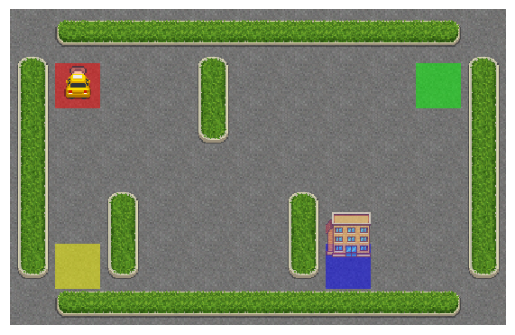

In [5]:
images = []
vec_env = model.get_env()
obs = vec_env.reset()

for i in tqdm(range(300)):
    action, _states = model.predict(obs, deterministic=True)
    obs, rewards, dones, info = vec_env.step(action)
    state_img = vec_env.render("rgb_array")
    fig = plt.figure()
    plt.imshow(state_img)
    plt.axis('off')
    display(fig)
    images.append(fig)
    clear_output(wait=True)  # Clear the output for the next image
    plt.close()

display(fig)